In [2]:
from readlogOld import *
import csv
import glob
from os.path import exists
import numpy as np


In [13]:
dirName = '/home/valentin/crazyflie/Recordings/tube/'
# dirName = '/home/valentin/crazyflie/Recordings/20240220_files/bolt/'
fileNameList = dirName+'sd_33_cf2401'
fileNameList = []
if len(fileNameList)==0:
    fileNameList = glob.glob(dirName+'cf_*')
    outInds=[]
    for i in range(len(fileNameList)):
        if exists(fileNameList[i]+'.csv') or fileNameList[i].find('.csv')!=-1:
            outInds.append(fileNameList[i])
    for value in outInds:
        fileNameList.remove(value)

for fileName in fileNameList:
    data = decode(fileName)
    samplingRate = 100

    with open(fileName +'.csv', 'w') as csv_file:
        keys = data.keys()
        writer = csv.DictWriter(csv_file, fieldnames=keys)
        writer.writeheader()
        longest_log_length = len(max(data.values(), key=len))
        for i in range(longest_log_length):
            writer.writerow({k: data[k][i] for k in keys})
    #logging.info('Successfully converted log file into CSV format.')



In [56]:
for k in data.keys():
    if 'state_' in k:
        print(k)

state_machine.vnom_sign
state_machine.P1_St_log
state_machine.SM_St_log
state_machine.vx_sp
state_machine.vy_sp
state_machine.TstSlwDwn
state_machine.ST_St_log
state_machine.futureSt
state_machine.zCommand
state_machine.zrMR18Valid
state_machine.zrangeValid
state_machine.zMR18Mean
state_machine.zrangMean
state_machine.height_sp
state_machine.flyTubeVz
state_machine.spFuncType
state_machine.estop
state_machine.distFront
state_machine.desPitch
state_machine.desRoll
state_machine.avOffsetX
state_machine.xTar
state_machine.avOffsetY


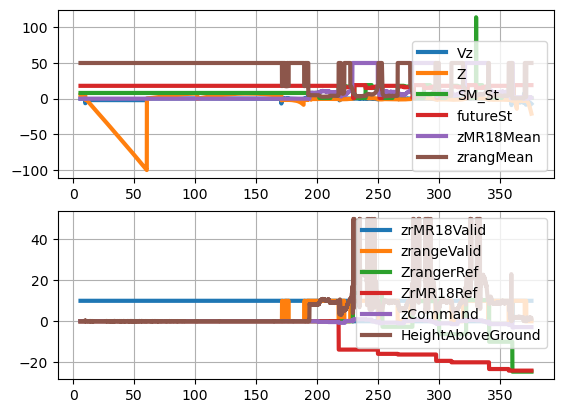

In [19]:
tim = data['tick']/1000
# tim = tim - tim[0]
# ind = np.where(tim > 150)
# print(str(tim))
plt.figure()
plt.subplot(2,1,1)
# # plt.plot(tim, data['dvio_data.velStdDevx'],linewidth=3)
# # plt.plot(tim, data['dvio_data.velStdDevy'],linewidth=3)
# # plt.plot(tim, data['dvio_data.velStdDevz'],linewidth=3)
# # plt.plot(tim, data['state_machine.ExtKalman'],linewidth=3)
# # plt.plot(tim, data['kalman.SensorConfig'],linewidth=3)
# # plt.plot(tim, data['kalman_states.useVel'],linewidth=3)

plt.plot(tim, data['stateEstimate.vz'], label='Vz',linewidth=3)
# # plt.plot(tim, data['kalman.statePX'],linewidth=3)
plt.plot(tim, data['stateEstimate.z'], label='Z',linewidth=3)
plt.plot(tim, data['state_machine.SM_St_log'], label='SM_St',linewidth=3)
plt.plot(tim, data['state_machine.futureSt'], label='futureSt',linewidth=3)
# plt.plot(tim, data['state_machine.zrMR18Valid'], label='zrMR18Valid',linewidth=3)
# plt.plot(tim, data['state_machine.zrangeValid'], label='zrangeValid',linewidth=3)
plt.plot(tim, data['state_machine.zMR18Mean']*10, label='zMR18Mean',linewidth=3)
plt.plot(tim, data['state_machine.zrangMean']*10, label='zrangMean',linewidth=3)
plt.grid(True)
plt.legend()
plt.subplot(2,1,2)
plt.plot(tim, data['state_machine.zrMR18Valid']*10, label='zrMR18Valid',linewidth=3)
plt.plot(tim, data['state_machine.zrangeValid']*10, label='zrangeValid',linewidth=3)
plt.plot(tim, data['range.ZrangerRef']*10, label='ZrangerRef',linewidth=3)
plt.plot(tim, data['range.ZrMR18Ref']*10, label='ZrMR18Ref',linewidth=3)
plt.plot(tim, data['state_machine.zCommand'], label='zCommand',linewidth=3)
# plt.plot(tim, data['range.lastZranger'], label='lastZranger',linewidth=3)
# plt.plot(tim, data['range.lastZrMR18'], label='lastZrMR18',linewidth=3)
plt.plot(tim, data['mr18.m16']/100, label='HeightAboveGround',linewidth=3)
plt.grid(True)
# plt.plot(tim, data['FF_Angle.HL_ratio'],linewidth=3)
# plt.plot(tim, data['motion.squal'],linewidth=3)
plt.legend()
# plt.plot(tim, data['gyro.x'],linewidth=1)

# # plt.plot(tim, data['range.ztrans'],linewidth=3)
# # plt.plot(tim, data['range.zmeas'],linewidth=3)
# # plt.plot(tim, data['range.vzTof'],linewidth=3)
# # plt.plot(tim, data['range.vzKal'],linewidth=3)
# # plt.plot(tim, data['stateEstimate.z'],linewidth=3)
# # plt.plot(tim, data['posCtl.targetZ']*100,linewidth=3)

# # plt.legend(['zref','ztrans','zmeas','vzTof','vzKal','stateEstimate.z'])
# # plt.plot(tim, data['stateEstimate.z'],linewidth=3)
# # plt.plot(tim, data['dvio_data.stdFacZ'],linewidth=3)


# # plt.plot(tim[1:], np.abs(np.diff(data['kalman_pred.tof_innov'])>0))
# # plt.plot(tim[ind], data['kalman.stateY'][ind],linewidth=3)
# # plt.plot(tim[ind], data['kalman.stateY_f'][ind],linewidth=3) #stateEstimate.z
# # plt.plot(data['kalman.stateX'][ind], data['kalman.stateY'][ind],linewidth=3) #stateEstimate.z
# # plt.plot(data['kalman.stateX_f'][ind], data['kalman.stateY_f'][ind],linewidth=3) #stateEstimate.z
# plt.xlabel('Time [s]')
# plt.ylabel('Position [m]')
# plt.grid(True)
# plt.show()


# plt.figure()
# plt.plot(tim, data['FF_Angle.HL_ratio'],linewidth=3)
# plt.plot(tim, data['FF_Angle.pitch_HL'],linewidth=3)
# plt.plot(tim, data['FF_Angle.pitch_cmd'],'--',linewidth=3)
# plt.plot(tim, data['LLAVD.pitch_LLAVD'],linewidth=3)
# # plt.plot(tim, data['LLAVD.roll_LLAVD'],linewidth=3)
# plt.plot(tim, data['LLAVD.pitch_MLAVD'],':',linewidth=3)
# # plt.plot(tim, data['LLAVD.roll_MLAVD'],linewidth=3)
# plt.legend(['HL_ratio', 'pitch_HL', 'pitch_cmd', 'LL','ML'])
# plt.show()

# plt.figure()
# plt.plot(tim, data['stateEstimate.roll'],'-',linewidth=3)
# plt.plot(tim, data['FF_Angle.HL_ratio'],linewidth=3)
# plt.plot(tim, data['FF_Angle.roll_HL'],linewidth=3)
# plt.plot(tim, data['FF_Angle.roll_cmd'],'--',linewidth=3)
# plt.plot(tim, data['LLAVD.roll_LLAVD'],'-.',linewidth=3)
# # plt.plot(tim, data['LLAVD.roll_LLAVD'],linewidth=3)
# plt.plot(tim, data['LLAVD.roll_MLAVD'],':',linewidth=3)
# # plt.plot(tim, data['LLAVD.roll_MLAVD'],linewidth=3)
# plt.plot(tim, data['state_machine.SM_St_log'],linewidth=3)
# plt.legend(['roll','HL_ratio', 'roll_HL', 'roll_cmd', 'LL','ML'])

# plt.show()
# plt.plot(tim, data['LLAVD.roll_MLAVD'],linewidth=3)
# plt.subplot(2,1,2)
# plt.plot(tim, data['motor.m1'],linewidth=3)
# plt.xlabel('Time [s]')
# plt.ylabel('Motor [PWM]')
# plt.grid(True)
plt.show()

In [14]:
def calcCenters(polyX, polyY):
    geomCenterX=np.mean(polyX)
    geomCenterY=np.mean(polyY)
    simpleCenterX=(np.max(polyX)-np.min(polyX))/2
    simpleCenterY=(np.max(polyY)-np.min(polyY))/2
    return simpleCenterX,simpleCenterY,geomCenterX,geomCenterY

testX = []
testY = []
testHullX = []
testHullY = []
testQuadX = []
testQuadY = []

datas=[]

with open("/home/valentin/crazyflie/Recordings/mr18Data.txt", "r") as file:
    data = file.read()

# Split the data by "[16]", "[4]", etc.
parts = data.split("[")
for part in parts[1:]:
    ind = part.find(']')
    part = part[(ind+1):]
    lines = part.strip().split('\n')
    datas.append([float(element) for element in lines])

    # Extract values for testX and testY
testX=datas[0]
testY=datas[1]

# Extract values for testHullX and testHullY
testHullX=datas[2]
testHullY=datas[3]
hullSimpleCenterX,hullSimpleCenterY,hullGeomCenterX,hullGeomCenterY = calcCenters(testHullX, testHullY)

# Extract values for testQuadX and testQuadY
testQuadX=datas[4]
testQuadY=datas[5]
quadSimpleCenterX,quadSimpleCenterY,quadGeomCenterX,quadGeomCenterY = calcCenters(testQuadX, testQuadY)

# trueRectX=np.array([-24.5, -24.5, 12, 12])/100*-1   
# trueRectY=np.array([-11,    25,   25, -11])/100
# Print the values

plt.plot(testX,testY,'x-')
plt.plot(testHullX,testHullY)
plt.plot(testQuadX,testQuadY)
# plt.plot(trueRectY,trueRectX)
plt.plot(hullSimpleCenterX,hullSimpleCenterY,'o')
plt.plot(hullGeomCenterX,hullGeomCenterY,'>')
plt.plot(quadSimpleCenterX,quadSimpleCenterY,'*')
plt.plot(quadGeomCenterX,quadGeomCenterY,'+')
plt.grid(True)
plt.axis('Equal')
plt.show()
